<a href="https://colab.research.google.com/github/Ahmed-Shatla/Detect-Person-Class-from-imges-CroppedYale-Faces-Dataset/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2

In [3]:
data_path = '/content/drive/MyDrive/Faces data/CroppedYale'
len(os.listdir(data_path))

38

In [4]:
def read_img(path):
  files_names = os.listdir(path) 
  imgs = []
  target = []
  for i in files_names:
    for j in os.listdir(path+'/'+i):
      if '.pgm' in j:
        img = cv2.imread(path+'/'+i+'/'+j)
        imgs.append(img)
        target.append(i)
  return imgs,target

In [5]:
from sklearn.model_selection import train_test_split
X,y = read_img(data_path)

In [6]:
X = np.array(X)
y = np.array(y).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [7]:
def resize_images(images):
  imgs = []
  images1 = np.asarray(images)
  for i in images1:
    img = cv2.resize(i,(168, 192))
    imgs.append(img)

  return imgs

In [8]:
images = resize_images(X)
images[1].shape

(192, 168, 3)

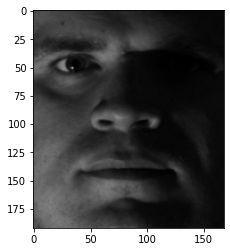

In [9]:
plt.imshow(X[20])

In [10]:
X_train, X_test, y_train, y_test =train_test_split(images,y,test_size=0.1,shuffle=True,random_state=1)
X_train = np.array(X_train)
X_train = X_train/255
X_test = np.array(X_test)
X_test = X_test/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
X_train.shape

(2223, 192, 168, 3)

In [12]:
y_train


array([['yaleB13'],
       ['yaleB10'],
       ['yaleB12'],
       ...,
       ['yaleB12'],
       ['yaleB08'],
       ['yaleB12']], dtype='<U7')

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(247, 38)

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(192,168,3)))

model.add(Dense(units=128,activation='relu'))

model.add(Dense(units=512,activation='relu'))


model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.1))   

model.add(Dense(units=512,activation='relu'))

model.add(Dense(units=128,activation='relu'))



model.add(Dense(38,activation = 'softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 96768)             0         
                                                                 
 dense (Dense)               (None, 128)               12386432  
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 128)               6

In [18]:
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

In [20]:
X_train, X_valid, y_train, y_valid =train_test_split(X_train,y_train,test_size=0.1,shuffle=True,random_state=1)
X_valid.shape

(223, 192, 168, 3)

In [21]:
trainG = train_gen.flow(X_train,y_train,batch_size=32)
validG = valid_gen.flow(X_valid,y_valid,batch_size=8)

In [22]:
steps_train = int(len(X_train)/32)
steps_validate = int(len(X_valid)/8)

In [23]:
history = model.fit_generator(trainG,
                                  steps_per_epoch=steps_train, 
                                  epochs=70,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


62/62 [==============================] - 7s 92ms/step - loss: 3.6391 - accuracy: 0.0259 - val_loss: 3.6283 - val_accuracy: 0.0370
Epoch 2/70
62/62 [==============================] - 6s 94ms/step - loss: 3.6119 - accuracy: 0.0401 - val_loss: 3.6107 - val_accuracy: 0.0417
Epoch 3/70
62/62 [==============================] - 6s 95ms/step - loss: 3.5494 - accuracy: 0.0701 - val_loss: 3.5481 - val_accuracy: 0.0463
Epoch 4/70
62/62 [==============================] - 6s 102ms/step - loss: 3.3810 - accuracy: 0.1240 - val_loss: 3.2393 - val_accuracy: 0.1528
Epoch 5/70
62/62 [==============================] - 6s 91ms/step - loss: 3.1271 - accuracy: 0.1758 - val_loss: 2.9621 - val_accuracy: 0.2269
Epoch 6/70
62/62 [==============================] - 5s 87ms/step - loss: 2.8615 - accuracy: 0.2287 - val_loss: 2.7189 - val_accuracy: 0.2222
Epoch 7/70
62/62 [==============================] - 6s 96ms/step - loss: 2.5274 - accuracy: 0.2886 - val_loss: 2.1887 - val_accuracy: 0.4306
Epoch 8/70
62/62 [=====

Text(0.5, 0, 'epochs')

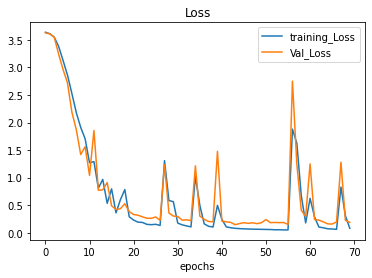

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

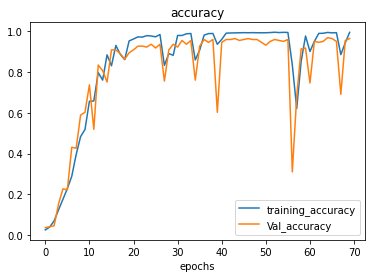

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [26]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)


8/8 - 0s - loss: 0.1525 - accuracy: 0.9676 - 381ms/epoch - 48ms/step


In [27]:
train_gen_augmanted = ImageDataGenerator(rotation_range=30,
                                         zoom_range=0.12,
                                         horizontal_flip=True)
trainGaug = train_gen_augmanted.flow(X_train,y_train,batch_size=32)

In [28]:
history = model.fit_generator(trainGaug,
                                  steps_per_epoch=steps_train, 
                                  epochs=70,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/70
62/62 [==============================] - 29s 464ms/step - loss: 3.9059 - accuracy: 0.0737 - val_loss: 2.7903 - val_accuracy: 0.3102
Epoch 2/70
62/62 [==============================] - 21s 335ms/step - loss: 3.3153 - accuracy: 0.1128 - val_loss: 2.3591 - val_accuracy: 0.4120
Epoch 3/70
62/62 [==============================] - 20s 318ms/step - loss: 3.1728 - accuracy: 0.1519 - val_loss: 1.9427 - val_accuracy: 0.5093
Epoch 4/70
62/62 [==============================] - 20s 316ms/step - loss: 3.0519 - accuracy: 0.1697 - val_loss: 1.6354 - val_accuracy: 0.7083
Epoch 5/70
62/62 [==============================] - 20s 328ms/step - loss: 2.9248 - accuracy: 0.2053 - val_loss: 1.5879 - val_accuracy: 0.6435
Epoch 6/70
62/62 [==============================] - 20s 327ms/step - loss: 2.8588 - accuracy: 0.2068 - val_loss: 1.6580 - val_accuracy: 0.6019
Epoch 7/70
62/62 [==============================] - 21s 331ms/step - loss: 2.7710 - accuracy: 0.2337 - val_loss: 1.4518 - val_accuracy: 0.6204

Text(0.5, 0, 'epochs')

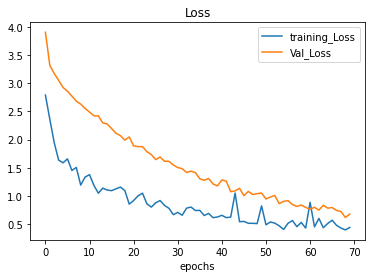

In [29]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

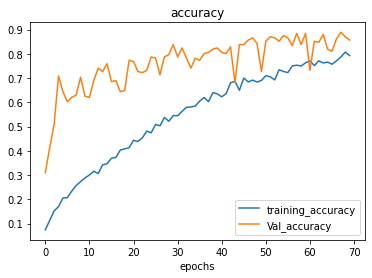

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [31]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)


8/8 - 0s - loss: 0.3496 - accuracy: 0.8947 - 256ms/epoch - 32ms/step
